**Importing Python Libraries**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
%matplotlib inline

from warnings import simplefilter
simplefilter("ignore")

from sklearn.preprocessing import StandardScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-f-t/manual_testing.csv
/kaggle/input/dataset-f-t/True.csv
/kaggle/input/dataset-f-t/Fake.csv
/kaggle/input/dataset-m/Liar_Dataset.csv


**Loading the data**

In [3]:
df = pd.read_csv("/kaggle/input/dataset-m/Liar_Dataset.csv")

**Exploratory Data Analysis (EDA)**

In [4]:
# Top 5 records of data
df.head(5)

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [5]:
#Last 5 records of data
df.tail(5)

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
12782,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70,71,160,163,9,a press conference
12783,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a speech on the economy
12784,401.json,TRUE,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0,1,0,2,0,a television ad
12785,1055.json,FALSE,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1,4,4,1,0,an Internet ad.
12786,9117.json,barely-true,No one claims the report vindicating New Jerse...,"candidates-biography,infrastructure",rudy-giuliani,Attorney,New York,republican,9,11,10,7,3,"comments on NBC's ""Meet the Press"""


Deleting the [ID].json coloumn because its just a name of file so not useful

In [11]:
# Check column names
print(df.columns)

# Drop the column if it exists, or ignore if it doesn't
df.drop(columns=['[ID].json'], errors='ignore', inplace=True)


Index(['label', 'statement', 'subject(s)', 'speaker', 'speaker's job title',
       'state info', 'party affiliation', 'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',
       'venue'],
      dtype='object')


Coloumns/features in data

In [7]:
df.columns

Index(['label', 'statement', 'subject(s)', 'speaker', 'speaker's job title',
       'state info', 'party affiliation', 'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',
       'venue'],
      dtype='object')

In [8]:
#Length of data
print('lenght of data is', len(df))

lenght of data is 12787


In [9]:
#Shape of Data
df.shape

(12787, 13)

In [12]:
#Getting the infromation present in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12787 entries, 0 to 12786
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   label                 12787 non-null  object
 1   statement             12787 non-null  object
 2   subject(s)            12787 non-null  object
 3   speaker               12787 non-null  object
 4   speaker's job title   9221 non-null   object
 5   state info            10038 non-null  object
 6   party affiliation     12787 non-null  object
 7   barely true counts    12787 non-null  int64 
 8   false counts          12787 non-null  int64 
 9   half true counts      12787 non-null  int64 
 10  mostly true counts    12787 non-null  int64 
 11  pants on fire counts  12787 non-null  int64 
 12  venue                 12658 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.3+ MB


In [13]:
df.dtypes

label                   object
statement               object
subject(s)              object
speaker                 object
speaker's job title     object
state info              object
party affiliation       object
barely true counts       int64
false counts             int64
half true counts         int64
mostly true counts       int64
pants on fire counts     int64
venue                   object
dtype: object

In [14]:
#Checking Null values
np.sum(df.isnull().any(axis=1))

4354

In [15]:
#Getting Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))

Count of columns in the data is:   13


In [16]:
print('Count of rows in the data is:  ', len(df))

Count of rows in the data is:   12787


In [17]:
#Checking Duplicate data
current=len(df)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  12787


In [18]:
df=df.drop_duplicates()

In [19]:
now=len(df)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  12786


In [20]:
diff=current-now
print('Duplicated rows are ', diff)

Duplicated rows are  1


In [21]:
#Checking Null Values
df.isnull().sum()

label                      0
statement                  0
subject(s)                 0
speaker                    0
speaker's job title     3566
state info              2749
party affiliation          0
barely true counts         0
false counts               0
half true counts           0
mostly true counts         0
pants on fire counts       0
venue                    129
dtype: int64

In [22]:
#Replacing NaN values to missing values
df.replace('', np.nan, inplace=True)

In [23]:
#Replacing unknown to missing values
df['venue']= df['venue'].replace(np.nan, 'Unknown')
df["speaker's job title"]= df["speaker's job title"].replace(np.nan, 'Unknown')
df["state info"]= df["state info"].replace(np.nan, 'Unknown')

In [24]:
#Checking Null values again
df.isnull().sum()

label                   0
statement               0
subject(s)              0
speaker                 0
speaker's job title     0
state info              0
party affiliation       0
barely true counts      0
false counts            0
half true counts        0
mostly true counts      0
pants on fire counts    0
venue                   0
dtype: int64

In [25]:
#Preparing the list of news types columns that are in numeric data types
num_cols = ['barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts']
num_cols

['barely true counts',
 'false counts',
 'half true counts',
 'mostly true counts',
 'pants on fire counts']

In [26]:
#Preparing list of the categorical columns
cate_cols = df.columns.drop('label').drop(num_cols)
cate_cols

Index(['statement', 'subject(s)', 'speaker', 'speaker's job title',
       'state info', 'party affiliation', 'venue'],
      dtype='object')

In [27]:
#Checking the number of unique values of each categorical column
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

statement              12761
subject(s)              4534
speaker                 3308
speaker's job title     1354
state info                84
party affiliation         24
venue                   5142
dtype: int64

**Data Preparation**

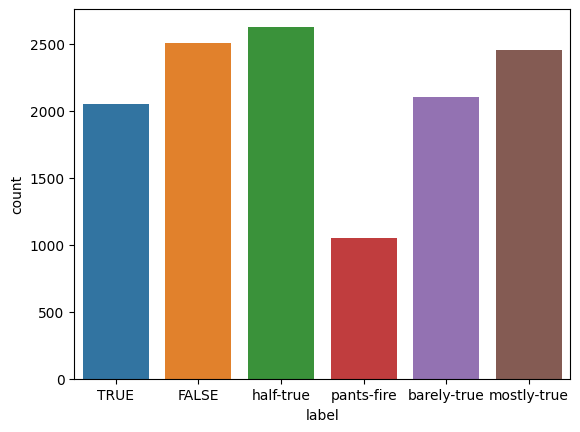

In [28]:
#Distribution of fake news labels
sns.countplot(data= df, x = "label")
plt.show()

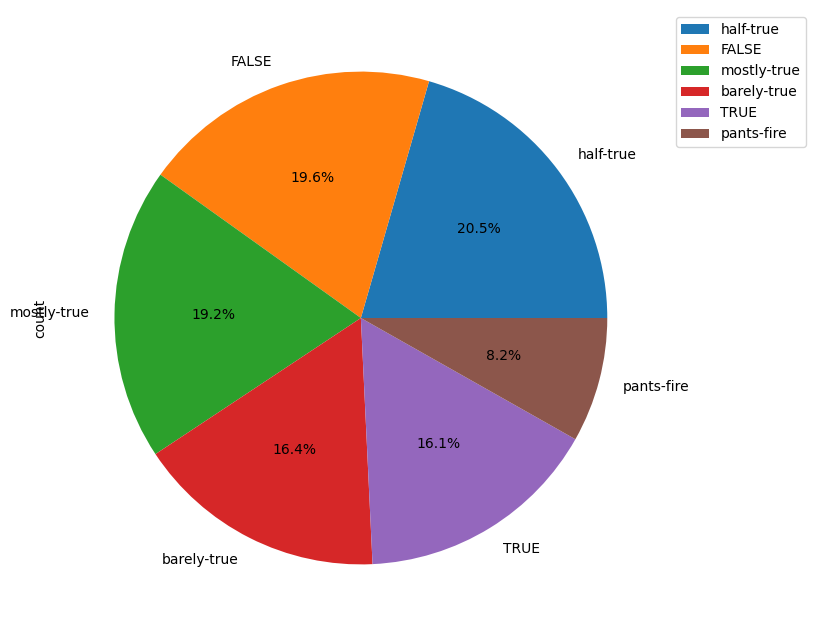

In [29]:
df["label"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

In [30]:
df["label"].value_counts()

label
half-true      2626
FALSE          2504
mostly-true    2454
barely-true    2102
TRUE           2053
pants-fire     1047
Name: count, dtype: int64

**Looking at the words which are in the barely-true news**

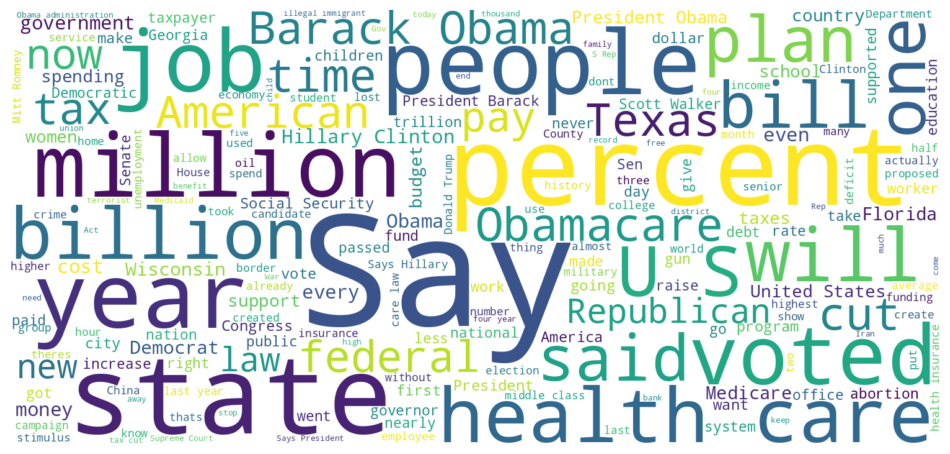

In [32]:
from wordcloud import WordCloud


# Assuming 'df' is my DataFrame and 'label' and 'statement' are column names
data1 = df[df['label'] == 'barely-true']
d = data1['statement']

# Convert statements to a single string
string_ = " ".join(map(str, d))

# Generate the word cloud
wordcloud = WordCloud(width=1500, height=700, max_font_size=250, background_color='white').generate(string_)

# Plot the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Looking at the words which are in the half-true news**

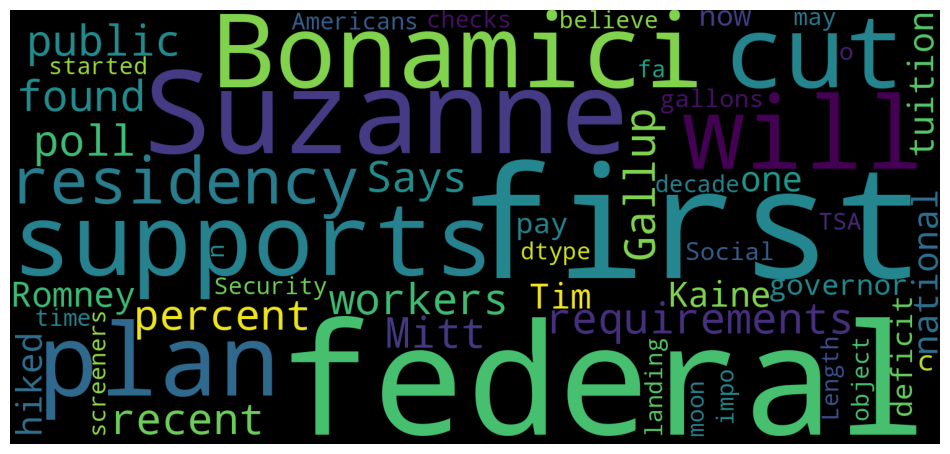

In [33]:
data1=df[df['label']=='half-true']
d =data1['statement']
string_ = []
for t in d:
    string_.append(t)
string_ = pd.Series(string_).map(str)
string_=str(string_)
wordcloud = WordCloud(width=1500, height=700,max_font_size=250, background_color ='black').generate(string_)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Looking at the words which are in the mostly-true news**

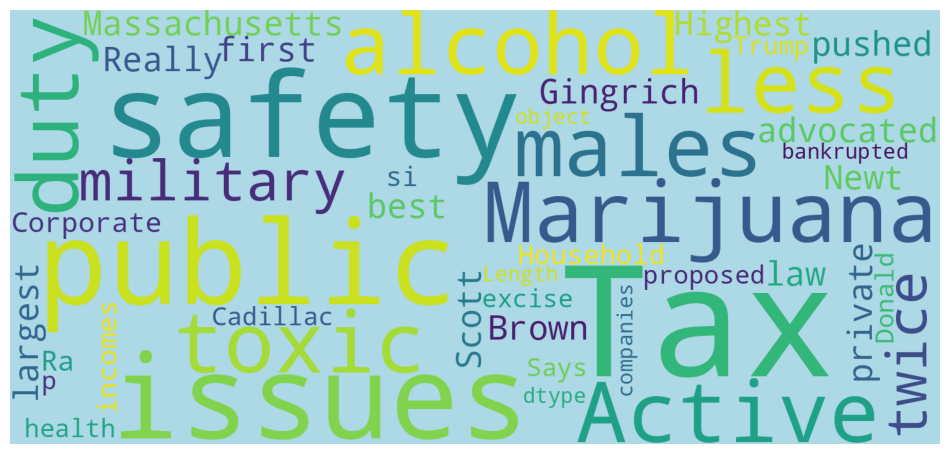

In [34]:
data1=df[df['label']=='mostly-true']
d =data1['statement']
string_ = []
for t in d:
    string_.append(t)
string_ = pd.Series(string_).map(str)
string_=str(string_)
wordcloud = WordCloud(width=1500, height=700,max_font_size=250, background_color ='lightblue').generate(string_)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Looking at the words which are in the TRUE news**

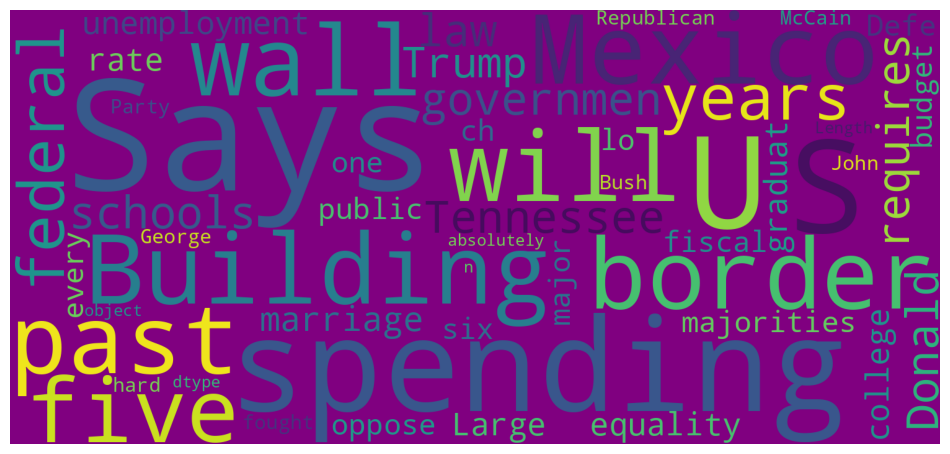

In [35]:
data1=df[df['label']=='TRUE']
d =data1['statement']
string_ = []
for t in d:
    string_.append(t)
string_ = pd.Series(string_).map(str)
string_=str(string_)
wordcloud = WordCloud(width=1500, height=700,max_font_size=250, background_color ='purple').generate(string_)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Looking at the words which are in the False news**

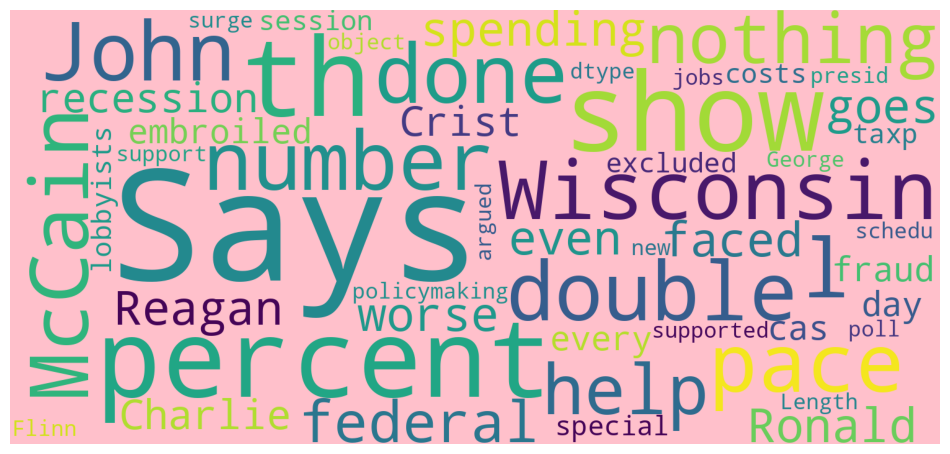

In [36]:
data1=df[df['label']=='FALSE']
d =data1['statement']
string_ = []
for t in d:
    string_.append(t)
string_ = pd.Series(string_).map(str)
string_=str(string_)
wordcloud = WordCloud(width=1500, height=700,max_font_size=250, background_color ='pink').generate(string_)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Looking at the words which are in the pants-fire news**

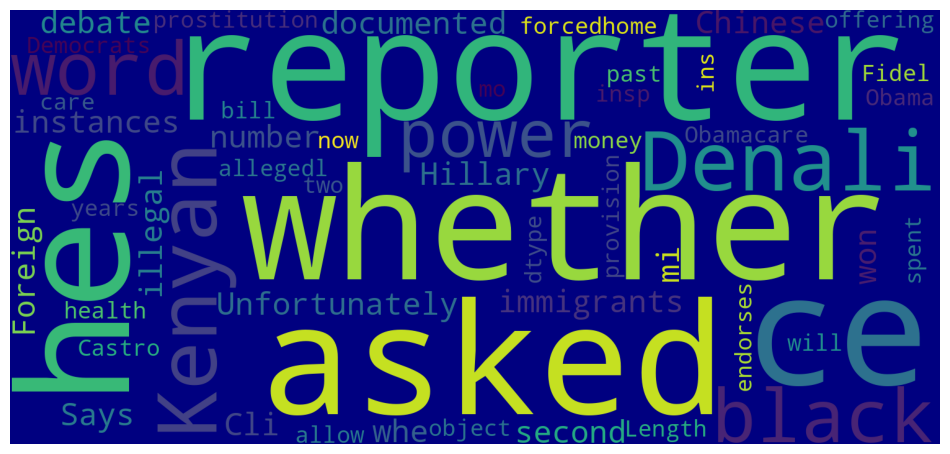

In [37]:
data1=df[df['label']=='pants-fire']
d =data1['statement']
string_ = []
for t in d:
    string_.append(t)
string_ = pd.Series(string_).map(str)
string_=str(string_)
wordcloud = WordCloud(width=1500, height=700,max_font_size=250, background_color ='navy').generate(string_)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

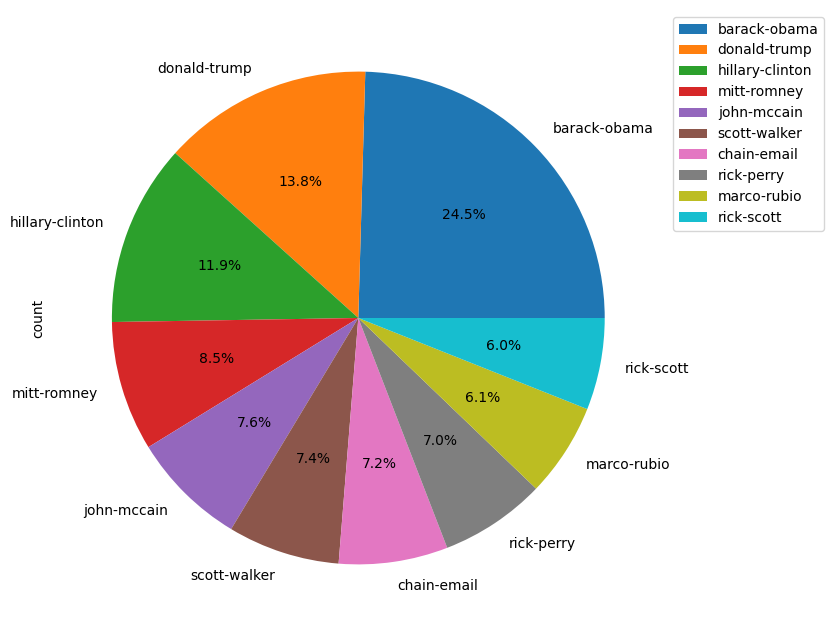

In [38]:
df["speaker"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

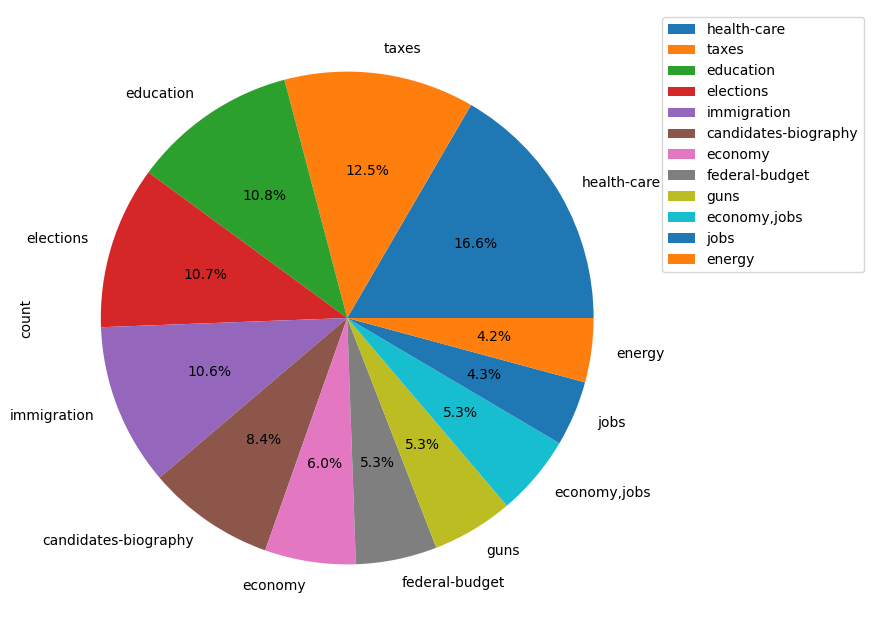

In [39]:
df["subject(s)"].value_counts().head(12).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

<Axes: xlabel='subject(s)'>

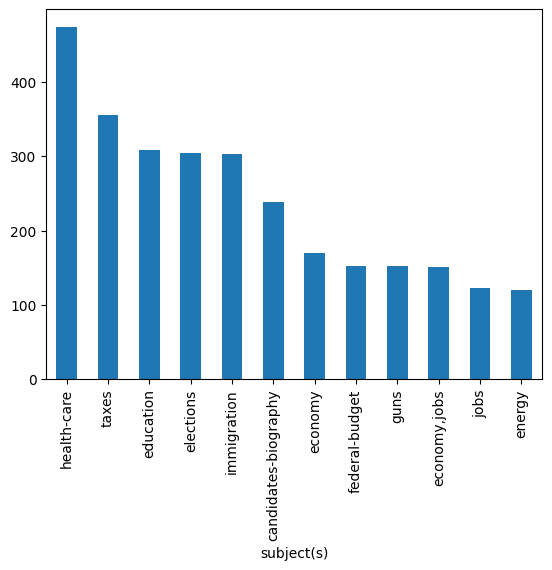

In [40]:
df["subject(s)"].value_counts().head(12).plot(kind='bar')

<Axes: xlabel="speaker's job title">

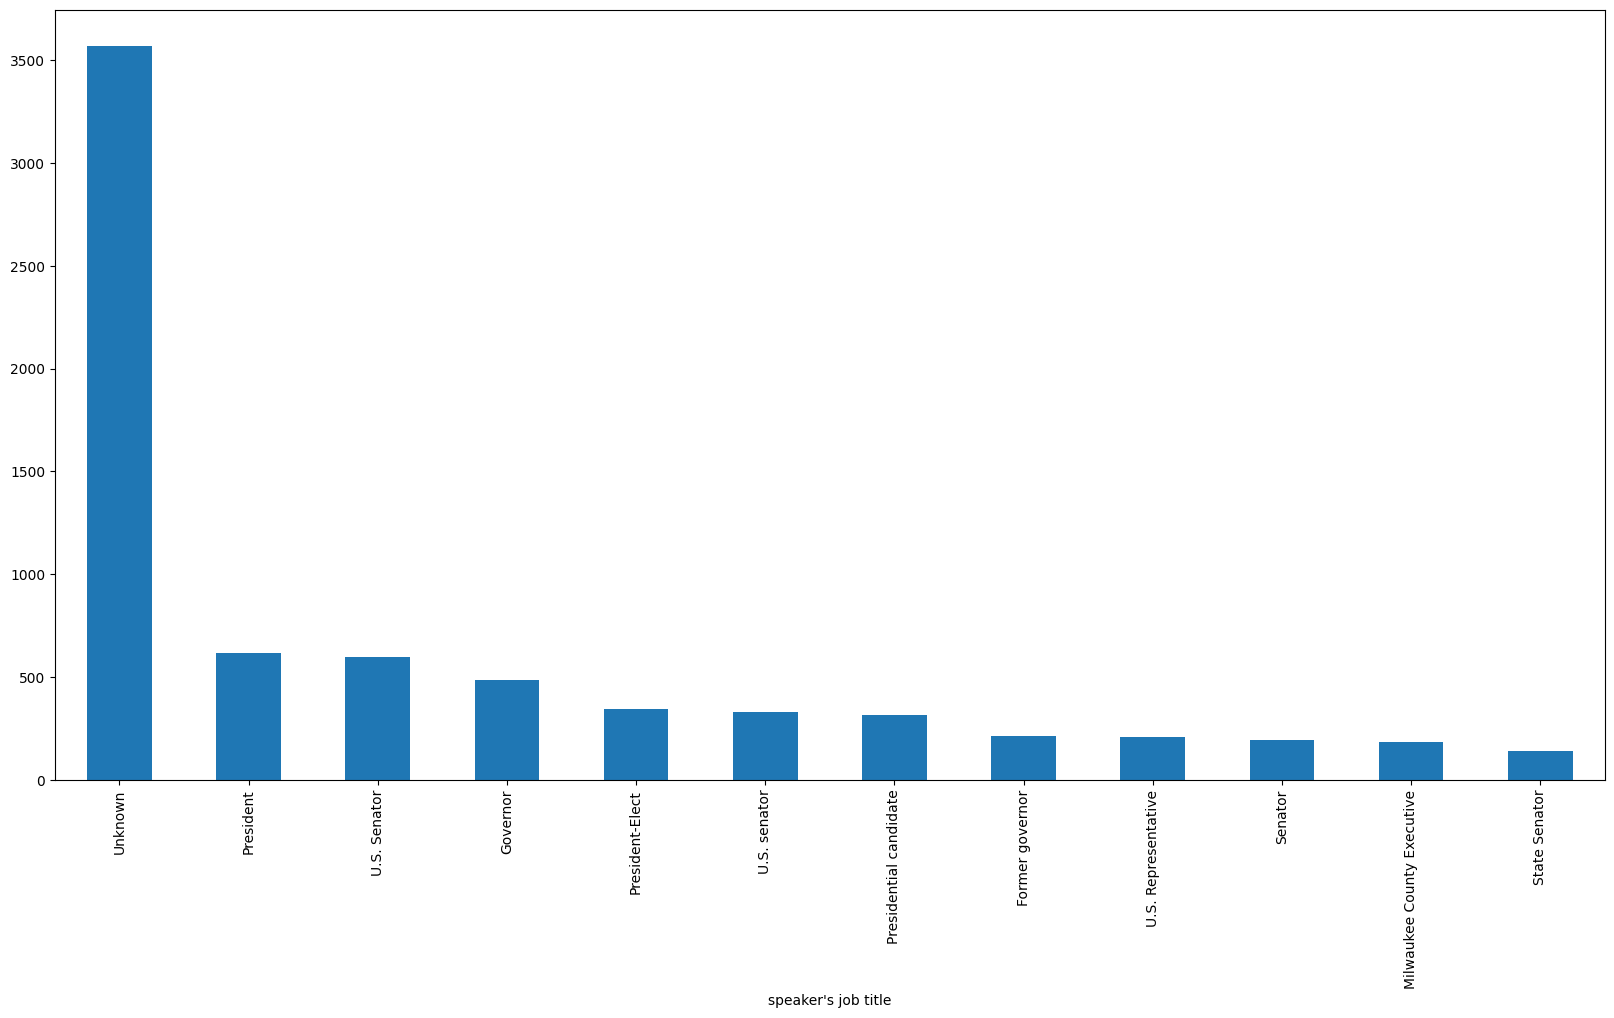

In [46]:
df["speaker's job title"].value_counts().head(12).plot(kind='bar')

In [48]:
num=df[['barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts']]
num=num.fillna(0)
num.head()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
0,30,30,42,23,18
1,2,1,0,0,0
2,63,114,51,37,61
3,1,1,3,1,1
4,5,7,2,2,7


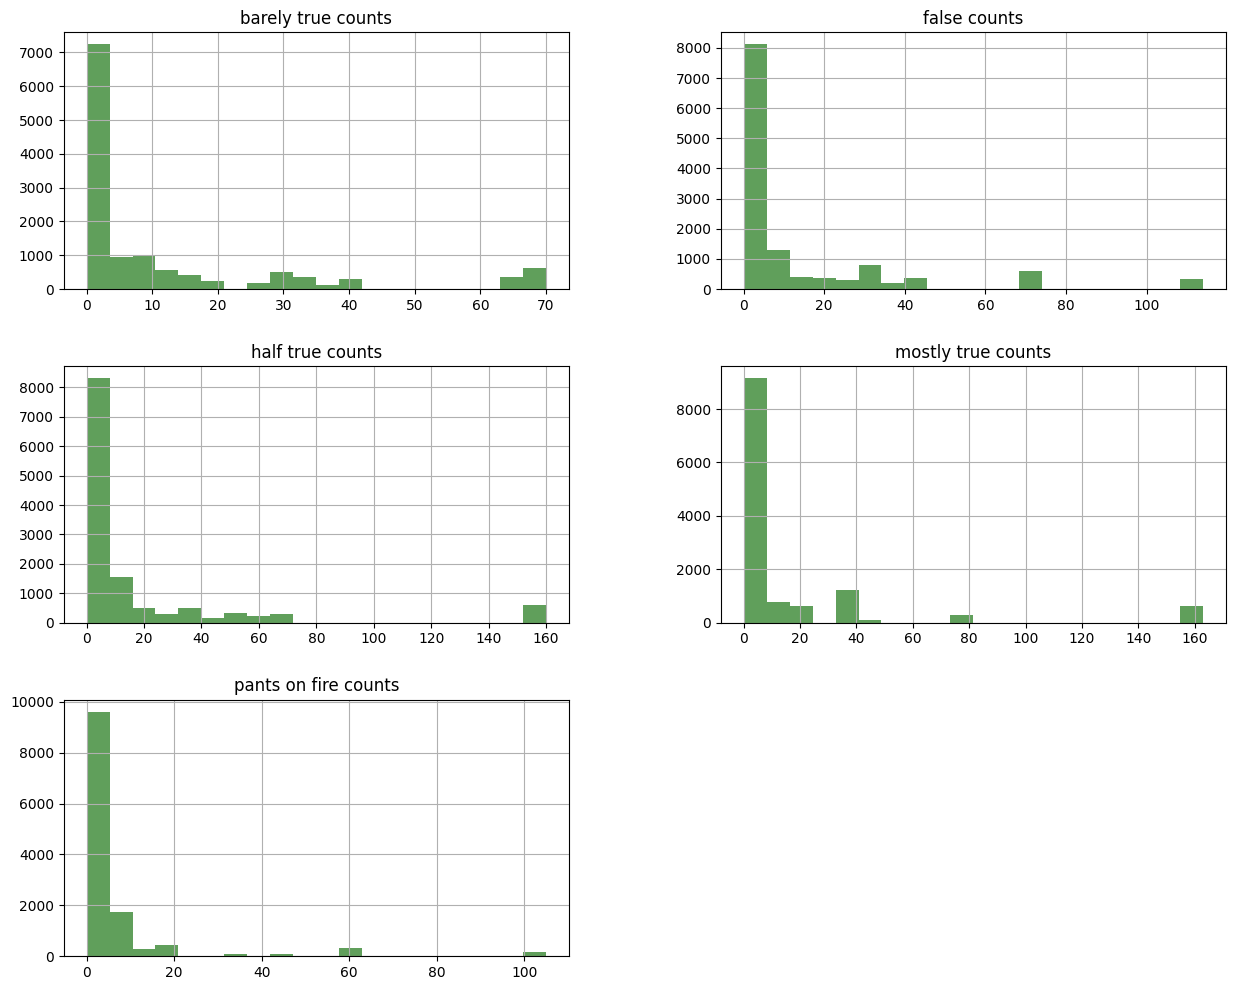

In [49]:
num.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

# K fold cross validation and splitting the data five times

In [52]:
from sklearn.model_selection import KFold

# Assuming 'df' is your DataFrame
kf = KFold(n_splits=5)
i = 0

for train_index, test_index in kf.split(df):
    i += 1
    print(f"KFold Split {i}")
    print(f"Train indices: {train_index}")
    print(f"Test indices: {test_index}")
    print('\n')


KFold Split 1
Train indices: [ 2558  2559  2560 ... 12783 12784 12785]
Test indices: [   0    1    2 ... 2555 2556 2557]


KFold Split 2
Train indices: [    0     1     2 ... 12783 12784 12785]
Test indices: [2558 2559 2560 ... 5112 5113 5114]


KFold Split 3
Train indices: [    0     1     2 ... 12783 12784 12785]
Test indices: [5115 5116 5117 ... 7669 7670 7671]


KFold Split 4
Train indices: [    0     1     2 ... 12783 12784 12785]
Test indices: [ 7672  7673  7674 ... 10226 10227 10228]


KFold Split 5
Train indices: [    0     1     2 ... 10226 10227 10228]
Test indices: [10229 10230 10231 ... 12783 12784 12785]




In [76]:
df_fake= pd.read_csv("/kaggle/input/dataset-f-t/True.csv")
df_true = pd.read_csv("/kaggle/input/dataset-f-t/Fake.csv")

In [77]:
df_fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [78]:
df_true.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Inserting a column "class" as target feature

In [79]:
df_fake["class"] = 0
df_true["class"] = 1

In [80]:
df_fake.shape, df_true.shape

((21417, 5), (23481, 5))

In [87]:
# Remove last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)

# Drop last 10 rows from df_fake
df_fake = df_fake.iloc[:-10]

df_true_manual_testing = df_true.tail(10)

# Drop last 10 rows from df_true
df_true = df_true.iloc[:-10]


In [88]:
df_fake.shape, df_true.shape

((21407, 5), (23471, 5))

In [89]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [90]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",0
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [91]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",1
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",1
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",1
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",1
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",1
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [93]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")


Merging True and Fake Dataframes

In [94]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [95]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [96]:
#Removing columns which are not required
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [97]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [98]:
#Random Shuffling the dataframe
df = df.sample(frac = 1)

In [99]:
df.head()

,text,class
9509,WASHINGTON (Reuters) - The White House on Tues...,0
7426,MEXICO CITY (Reuters) - Mexico was pitched int...,0
182,Yet another horrible human being decided to ra...,1
6256,"Mark Cuban is not a fan on Donald Trump, and h...",1
9057,EAG News A Wyoming high school is under fire ...,1


In [101]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [103]:
df.columns

Index(['text', 'class'], dtype='object')

In [104]:
df.head()

,text,class
0,WASHINGTON (Reuters) - The White House on Tues...,0
1,MEXICO CITY (Reuters) - Mexico was pitched int...,0
2,Yet another horrible human being decided to ra...,1
3,"Mark Cuban is not a fan on Donald Trump, and h...",1
4,EAG News A Wyoming high school is under fire ...,1


In [105]:
#Creating a function to process the texts
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [106]:
df["text"] = df["text"].apply(wordopt)

**Defining dependent and independent variables**

In [108]:
x = df["text"]
y = df["class"]

# Splitting Training and Testing

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [110]:
#Convert text into Vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Machine Learning Modelling

> # Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [113]:
pred_lr=LR.predict(xv_test)

In [114]:
LR.score(xv_test, y_test)

0.9870766488413547

In [115]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5269
           1       0.99      0.99      0.99      5951

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



> # Decision Tree Classification

In [118]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [119]:
pred_dt = DT.predict(xv_test)

In [120]:
DT.score(xv_test, y_test)

0.9945632798573975

In [121]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5269
           1       0.99      0.99      0.99      5951

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



> # Gradient Boosting Classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [124]:
pred_gbc = GBC.predict(xv_test)

In [125]:
GBC.score(xv_test, y_test)

0.9950089126559715

In [126]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5269
           1       1.00      0.99      1.00      5951

    accuracy                           1.00     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       1.00      1.00      1.00     11220



> # Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [128]:
pred_rfc = RFC.predict(xv_test)

In [129]:
RFC.score(xv_test, y_test)

0.9910873440285205

In [130]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5269
           1       0.99      0.99      0.99      5951

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Model Testing

In [134]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [139]:
news = str(input())
manual_testing(news)

 As U.S. budget fight looms, Republicans flip their fiscal script




LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


In [136]:
news = str(input())
manual_testing(news)

 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News


In [138]:
news = str(input())
manual_testing(news)

 BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they 



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [140]:
news = str(input())
manual_testing(news)

  Donald Trump Sends Out Embarrassing New Yearâ€™s Eve Message; This is Disturbing




LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
